# Assigment 2 - Darido Maria, Serilli Leonardo 

In [78]:
import networkx as nx
from itertools import combinations, chain, groupby
import pygraphviz as pygv
import random 
import matplotlib.pyplot as plt

# Drawing function
def draw(G, node_color='lightblue', edge_color='gray'):
    pos=nx.shell_layout(G)
    node_lab = {i for i in G.nodes()}
    plt.figure(figsize=(4,4))
    nx.draw(G, pos, with_labels=True, node_color=node_color, edge_color=edge_color, node_size=500)
    plt.show()

# random graph generator 
def gnp_random_connected_graph(n, p):
    edges = combinations(range(n), 2)
    G = nx.Graph()
    G.add_nodes_from(range(n))
    if p <= 0:
        return G
    if p >= 1:
        return nx.complete_graph(n, create_using=G)
    for _, node_edges in groupby(edges, key=lambda x: x[0]):
        node_edges = list(node_edges)
        random_edge = random.choice(node_edges)
        G.add_edge(*random_edge)
        for e in node_edges:
            if random.random() < p:
                G.add_edge(*e)
    return G

In [79]:
# The function computes the graph edit distance by building G1 starting on G2 in the following way:
    # 1. Check #nodes of both graph,then perform adding or removing operations to make them match 
    # 2. Rename nodes to match labels
    # 3. Remove G2's edges not present in G1
    # 4. Add G1's edges to G2 
    
def ged(G1, G2):
    cost = 0
    
    # Add nodes 
    if len(G1.nodes) < len(G2.nodes): 
        diff = list(set(G2.nodes) - set(G1.nodes))
        for n in diff:
            G1.add_node(n) 
            cost += 1      
    # Remove extra nodes
    if len(G1.nodes) > len(G2.nodes):
        diff = list(set(G1.nodes) - set(G2.nodes))
        for n in diff:
            G1.remove_node(n) 
            cost += 1
    
    start_chng = []
    end_chng = []
    
    for n in G1.nodes:
        if n not in G2.nodes:
            start_chng.append(n)
    for n in G2.nodes:
        if n not in G1.nodes:
            end_chng.append(n)
            
    cost += 1*len(start_chng)
    zip_iterator = zip(start_chng, end_chng)
    mapping = dict(zip_iterator)
    G1 = nx.relabel_nodes(G1, mapping, copy = False)
    
    # Add missing edges and remove superfluous edges in G2
    for n in G2.nodes:
        toRemove = list(set(G1.neighbors(n))-set(G2.neighbors(n)))
        for rem in toRemove:
            G1.remove_edge(n, rem)
            cost += 1
    for n in G2.nodes:
        toAdd = list(set(G2.neighbors(n))-set(G1.neighbors(n)))
        for rem in toAdd:
            G1.add_edge(n, rem)
            cost += 1
    
    return cost

____________________ G1 ____________________


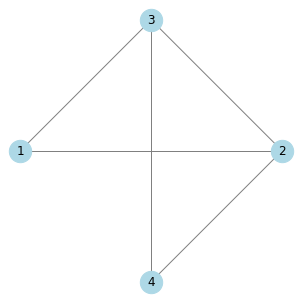

____________________ G2 ____________________


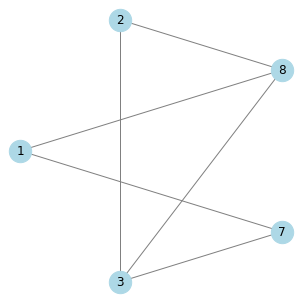

===========> the ged is 10


In [80]:
# Build graphs taken from the slides
G1 = nx.Graph()
G2 = nx.Graph()

G1.add_nodes_from([1,4])
G1.add_edges_from([(1,2),(1,3),(2,3),(3,4),(4,2)])

G2.add_nodes_from([1,3])
G2.add_nodes_from([7,8])
G2.add_edges_from([(1,8),(8,3),(3,7),(7,1),(8,2),(3,2)])

# draw graphs
print("____________________ G1 ____________________")
draw(G1)
print("____________________ G2 ____________________")
draw(G2)

# compute the ged by the above defined function
cost = ged(G1, G2)
print("===========> the ged is " + str(cost))

____________________ G1 ____________________


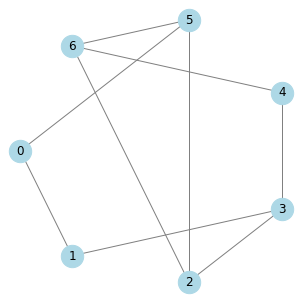

____________________ G2 ____________________


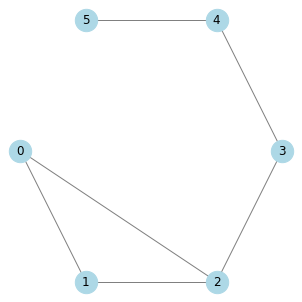

===========> the ged is 7


In [81]:
# Random example 1
G1 = gnp_random_connected_graph(7, 0.3)
G2 = gnp_random_connected_graph(6, 0.2)

print("____________________ G1 ____________________")
draw(G1)
print("____________________ G2 ____________________")
draw(G2)

cost = ged(G1, G2)
print("===========> the ged is " + str(cost))

____________________ G1 ____________________


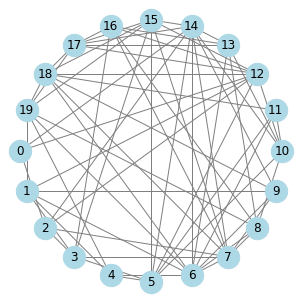

____________________ G2 ____________________


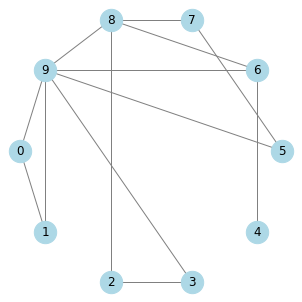

===========> the ged is 27


In [82]:
# random example 2
G1 = gnp_random_connected_graph(20, 0.3)
G2 = gnp_random_connected_graph(10, 0.2)

print("____________________ G1 ____________________")
draw(G1)
print("____________________ G2 ____________________")
draw(G2)

cost = ged(G1, G2)
print("===========> the ged is " + str(cost))